In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [96]:
df=pd.read_csv('/content/drug200.csv')

In [97]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [98]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [100]:
df.describe(include='all')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,DrugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


<Axes: >

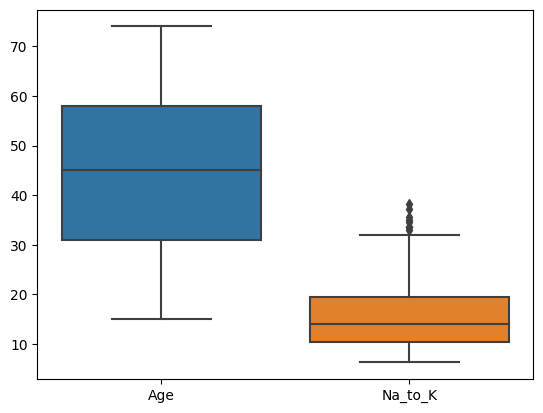

In [101]:
sns.boxplot(df)

In [102]:
#Outliers are present in Na_to_K column so we need to replace them with median values

q1 = df.Na_to_K.quantile(.25)
q3 = df.Na_to_K.quantile(.75)
IQR = q3 - q1
print(IQR)

8.9345


In [103]:
upper_limit = q3+1.5*IQR
lower_limit = q1-1.5*IQR
df.median()

<ipython-input-103-e7658ec4f1f9>:3: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


Age        45.0000
Na_to_K    13.9365
dtype: float64

In [104]:
df['Na_to_K'] =np.where(df['Na_to_K']>upper_limit,13.9365,df['Na_to_K'])

<Axes: >

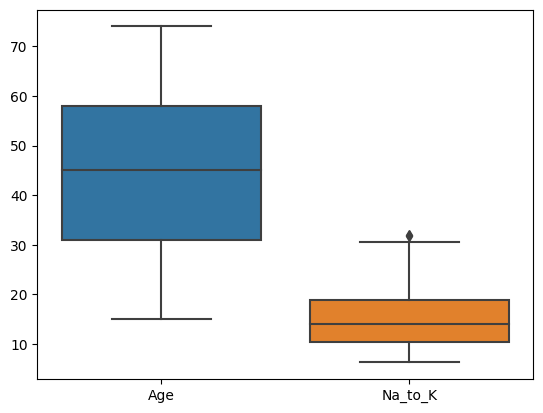

In [105]:
sns.boxplot(df)

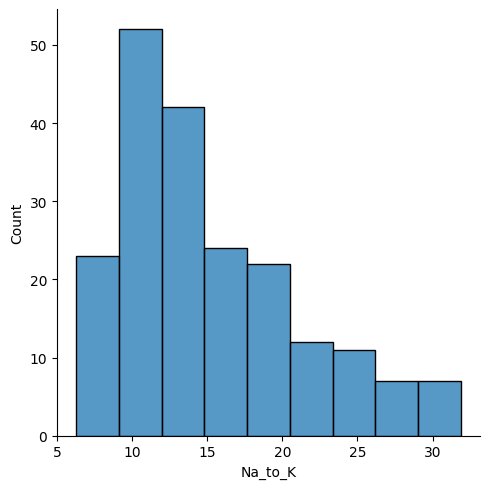

In [106]:
sns.displot(df["Na_to_K"])

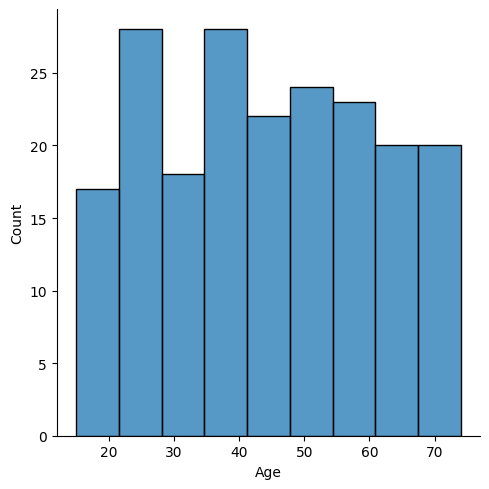

In [107]:
sns.displot(df["Age"])

In [108]:
le=LabelEncoder()

In [109]:
df["BP"]=le.fit_transform(df["BP"])

In [110]:
df["Cholesterol"]=le.fit_transform(df["Cholesterol"])

In [111]:
dum=pd.get_dummies(df["Sex"])
df=pd.concat([df,dum],axis=1)
df.drop(["Sex"],axis=1,inplace=True)

In [112]:
x=df.drop("Drug",axis=1)
x



,Age,BP,Cholesterol,Na_to_K,F,M
0,23,0,0,25.355,1,0
1,47,1,0,13.093,0,1
2,47,1,0,10.114,0,1
3,28,2,0,7.798,1,0
4,61,1,0,18.043,1,0
...,...,...,...,...,...,...
195,56,1,0,11.567,1,0
196,16,1,0,12.006,0,1
197,52,2,0,9.894,0,1
198,23,2,1,14.020,0,1


In [113]:
y=pd.get_dummies(df["Drug"])
y

,DrugY,drugA,drugB,drugC,drugX
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,0,1
4,1,0,0,0,0
...,...,...,...,...,...
195,0,0,0,1,0
196,0,0,0,1,0
197,0,0,0,0,1
198,0,0,0,0,1


In [114]:
x.head()

,Age,BP,Cholesterol,Na_to_K,F,M
0,23,0,0,25.355,1,0
1,47,1,0,13.093,0,1
2,47,1,0,10.114,0,1
3,28,2,0,7.798,1,0
4,61,1,0,18.043,1,0


In [115]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [116]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((160, 6), (40, 6), (160, 5), (40, 5))

In [117]:
model=Sequential()

In [118]:
model.add(Dense(20,input_dim=6,activation="relu"))
model.add(Dense(40,activation="relu"))
model.add(Dense(80,activation="relu"))
model.add(Dense(40,activation="relu"))
model.add(Dense(5,activation="softmax"))

In [119]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [120]:
model.fit(x_train,y_train,epochs=10,batch_size=5,validation_data=(x_test,y_test))

Epoch 1/10
32/32 [==============================] - 1s 9ms/step - loss: 1.5952 - accuracy: 0.4062 - val_loss: 1.3677 - val_accuracy: 0.4500
Epoch 2/10
32/32 [==============================] - 0s 3ms/step - loss: 1.2069 - accuracy: 0.5125 - val_loss: 1.2190 - val_accuracy: 0.5250
Epoch 3/10
32/32 [==============================] - 0s 3ms/step - loss: 1.1725 - accuracy: 0.5437 - val_loss: 1.2075 - val_accuracy: 0.5250
Epoch 4/10
32/32 [==============================] - 0s 3ms/step - loss: 1.0683 - accuracy: 0.5688 - val_loss: 1.1145 - val_accuracy: 0.5500
Epoch 5/10
32/32 [==============================] - 0s 4ms/step - loss: 1.1098 - accuracy: 0.5125 - val_loss: 1.2399 - val_accuracy: 0.5500
Epoch 6/10
32/32 [==============================] - 0s 3ms/step - loss: 1.0672 - accuracy: 0.5625 - val_loss: 1.1842 - val_accuracy: 0.5250
Epoch 7/10
32/32 [==============================] - 0s 4ms/step - loss: 1.0505 - accuracy: 0.5688 - val_loss: 1.1302 - val_accuracy: 0.5250
Epoch 8/10
32/32 [==

In [121]:
x.head()

,Age,BP,Cholesterol,Na_to_K,F,M
0,23,0,0,25.355,1,0
1,47,1,0,13.093,0,1
2,47,1,0,10.114,0,1
3,28,2,0,7.798,1,0
4,61,1,0,18.043,1,0


In [122]:
original=pd.DataFrame(y_test)
predict=pd.DataFrame(model.predict(x_test))

2/2 [==============================] - 0s 4ms/step


In [123]:
original.head()

,DrugY,drugA,drugB,drugC,drugX
108,0,0,1,0,0
147,0,1,0,0,0
56,0,0,1,0,0
98,1,0,0,0,0
196,0,0,0,1,0


In [124]:
predict.columns=["DrugY_pred","DrugA_pred","DrugB_pred","DrugC_pred","DrugX_pred"]

In [125]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 20)                140       
                                                                 
 dense_16 (Dense)            (None, 40)                840       
                                                                 
 dense_17 (Dense)            (None, 80)                3280      
                                                                 
 dense_18 (Dense)            (None, 40)                3240      
                                                                 
 dense_19 (Dense)            (None, 5)                 205       
                                                                 
Total params: 7,705
Trainable params: 7,705
Non-trainable params: 0
_________________________________________________________________


In [126]:
predict.head()

,DrugY_pred,DrugA_pred,DrugB_pred,DrugC_pred,DrugX_pred
0,0.011448,0.092300,0.220725,0.109437,0.566090
1,0.469030,0.124402,0.039784,0.071558,0.295227
2,0.026001,0.100144,0.201082,0.108796,0.563977
3,0.682904,0.090989,0.019946,0.043180,0.162980
4,0.635940,0.109281,0.025718,0.053401,0.175661


In [127]:
model.predict([[23,0,0,25,1,0]])

1/1 [==============================] - 0s 89ms/step


array([[9.7793204e-01, 8.7532774e-03, 5.2160223e-04, 1.8470400e-03,
        1.0945980e-02]], dtype=float32)